In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from sklearn.linear_model import LinearRegression # To work on Linear Regression
from sklearn.metrics import r2_score # To Calculate Performance matrix
import statsmodels.api as sm # To calculatestats modles

In [2]:
data = pd.read_csv('mobile.csv')

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.shape

(700, 2)

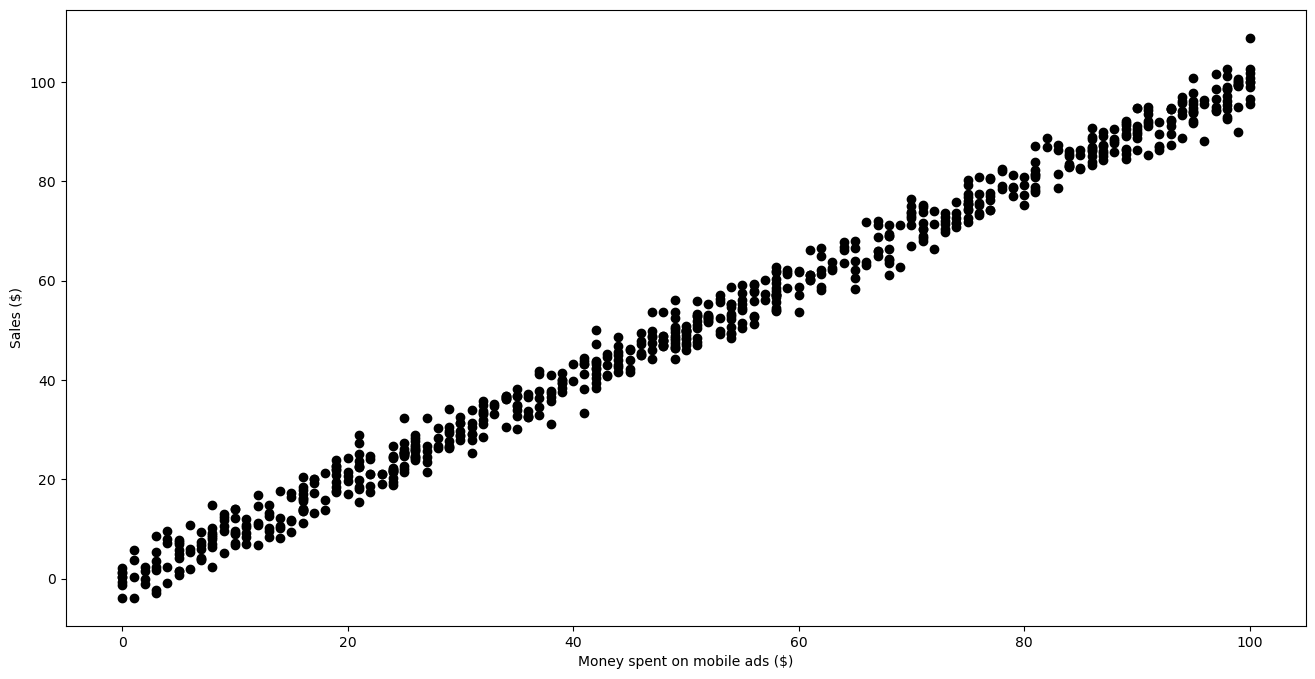

In [5]:
plt.figure(figsize=(16, 8)) ## Plotting TV ad vs Sales
plt.scatter(data['x'],data['y'],c='black')
plt.xlabel("Money spent on mobile ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
training, testing =train_test_split(data, test_size= 0.30, random_state=24)

In [7]:
training

,x,y
299,25.0,26.033237
185,31.0,29.196932
392,1.0,-3.839981
338,62.0,61.265146
220,54.0,49.447854
...,...,...
145,95.0,95.460922
401,10.0,9.230857
343,93.0,92.012034
192,52.0,55.345299


In [8]:
data.fillna(data['y'].mean(),inplace=True)

In [9]:
m = 0
c = 0
L = 0.01 # The learning Rate
epochs = 5 # The number of iterations to perform gradient descent
n = float(len(data['x'])) # Number of elements in X
# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*(data['x']) + c # The current predicted value of Y
    D_m = (-2/n) * sum(data['x'] * (data['y'] - Y_pred)) # Derivative wrt m
    D_c = (-2/n) * sum(data['y'] - Y_pred) # Derivative wrt c
    m = m - L * D_m # Update m
    c = c - L * D_c # Update c
print (m, c)

2261351612013.9614 5883017440.198121


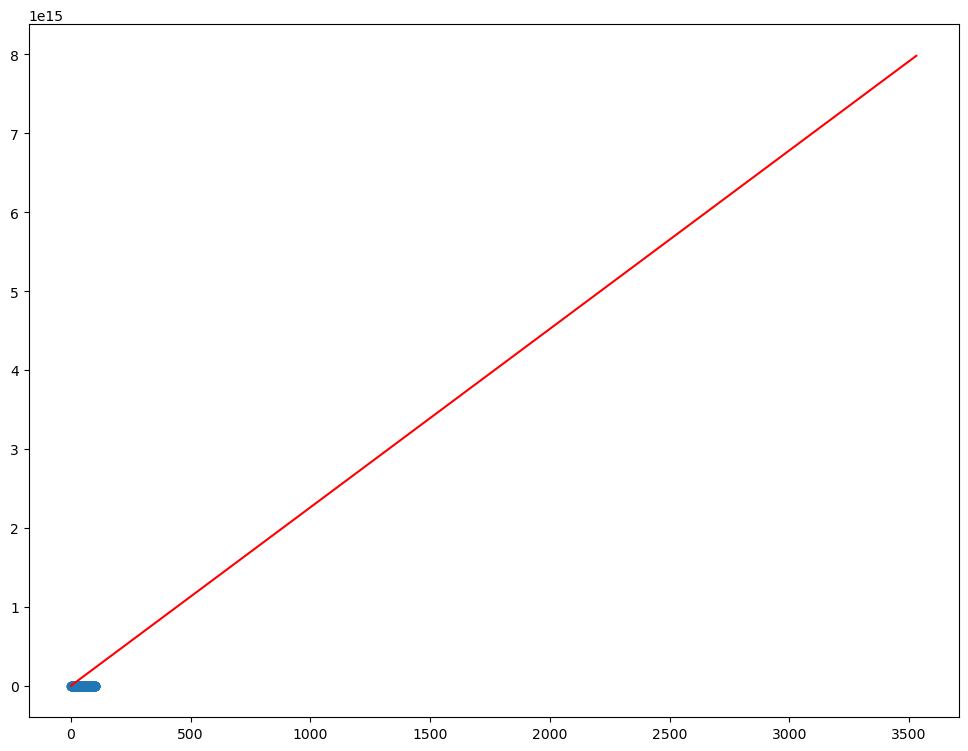

In [10]:
Y_pred = m*(testing['x']) + c
plt.scatter(testing['x'],testing['y'])
plt.plot([min(testing['x']), max(testing['x'])], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [17]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y ~ x', data=data).fit() #ordinary least squared model.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     33.44
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.11e-08
Time:                        09:53:37   Log-Likelihood:                -3335.6
No. Observations:                 700   AIC:                             6675.
Df Residuals:                     698   BIC:                             6684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.4005      1.161     40.827      0.000      45.121      49.680
x              0.0462      0.008      5.783      0.000       0.031       0.062
==============================================================================
Omnibus:                        4.923   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.750
Skew:                          -0.185   Prob(JB):                       0.0930
Kurtosis:                       3.161   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [13]:
data.fillna(data['y'].mean(),inplace=True)

In [14]:
data.isnull().sum()

x    0
y    0
dtype: int64